In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/StevenCipriano/.virtualenvs/data-science/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


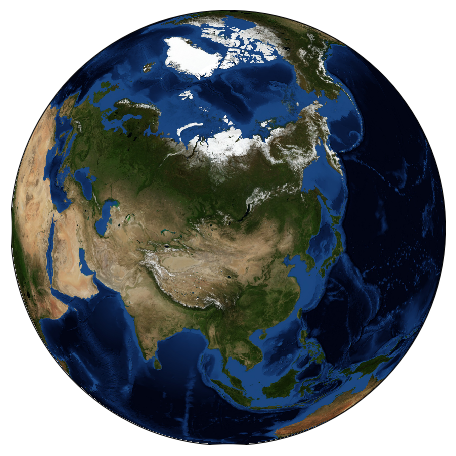

In [4]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=100)
m.bluemarble(scale=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


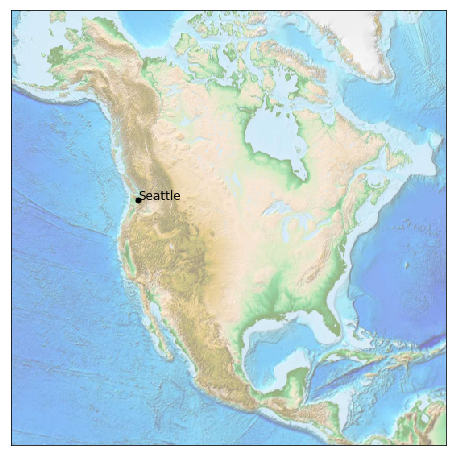

In [9]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
           width=8E6, height=8E6,
           lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'Seattle', fontsize=12);

In [10]:
## Map Projections

In [14]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    
    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

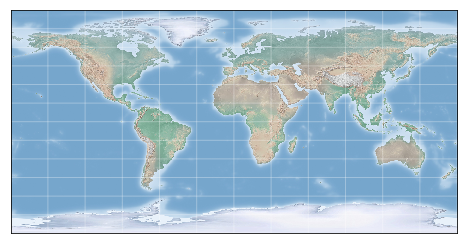

In [15]:
# cylindrical projections

fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
           llcrnrlat=-90, urcrnrlat=90,
           llcrnrlon=-180, urcrnrlon=180)
draw_map(m)

In [16]:
# pseudo-cylindrical projections

/Users/StevenCipriano/.virtualenvs/data-science/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


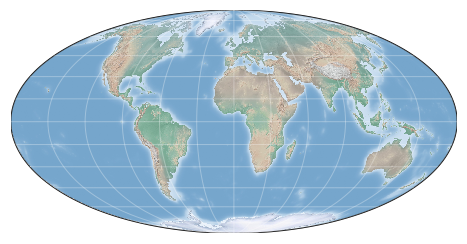

In [17]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
           lat_0=0, lon_0=0)
draw_map(m)

/Users/StevenCipriano/.virtualenvs/data-science/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


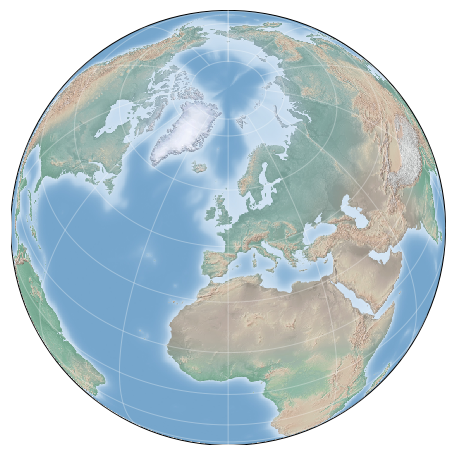

In [18]:
# perspective projections

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
           lat_0=50, lon_0=0)
draw_map(m);

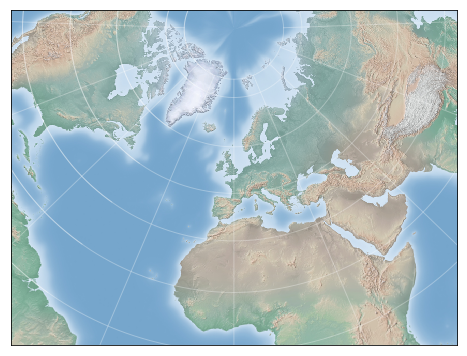

In [19]:
# conic projections

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
           lon_0=0, lat_0=50, lat_1=45, lat_2=55,
           width=1.6E7, height=1.2E7)
draw_map(m)

/Users/StevenCipriano/.virtualenvs/data-science/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/StevenCipriano/.virtualenvs/data-science/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


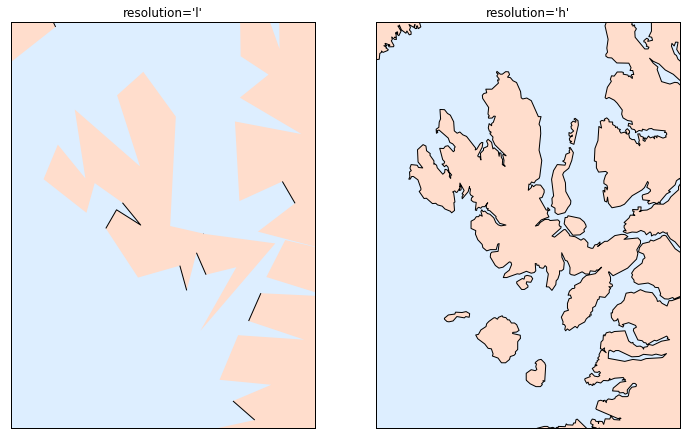

In [20]:
# draw isle of sky with varying degrees of detail

fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
               width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

In [21]:
## Plotting data on maps

In [22]:
## California cities

In [25]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

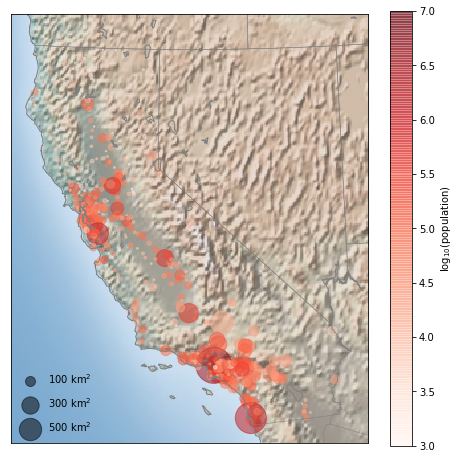

In [28]:
# 1. draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h',
           lat_0=37.5, lon_0=-119,
           width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population and size reflecting area
m.scatter(lon, lat, latlon=True,
         c=np.log10(population), s=area,
         cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
               label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');

In [30]:
## Surface Temperature Data

# download data: curl -O http://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz

In [31]:
from netCDF4 import Dataset
data = Dataset('data/gistemp250.nc')

In [32]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                      data.variables['time'])

In [34]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

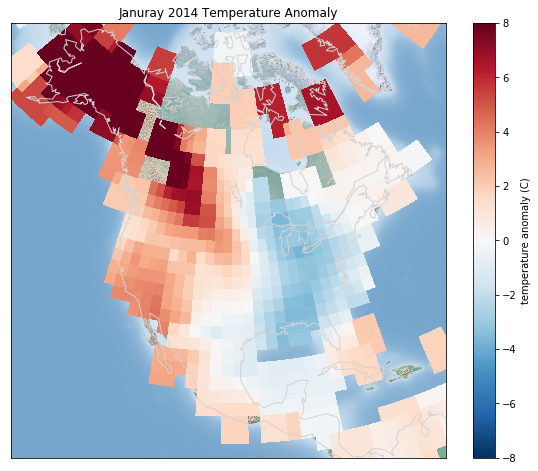

In [35]:
# intentionally choose a divergent, 2 tone color map

fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
           width=8E6, height=8E6,
           lat_0=45, lon_0=-100)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
            latlon=True,cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('Januray 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (C)');